In [ ]:
!pip install --upgrade  pandas
!pip install --upgrade  pandas_gbq
!pip install --upgrade  pyspark

In [1]:
from pandas.io import gbq

project_id = "your_project_id"
query = "SELECT * FROM `bigquery-public-data.samples.natality` limit 10000"

births = gbq.read_gbq(query=query, dialect ='standard', project_id=project_id)
births.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,1974,1974,6,30,NaN,CA,False,7,4.437905,1,...,None,NaN,NaN,7,55,55,8,7,30,2
1,1989,1989,9,NaN,6,CA,False,7,6.525683,1,...,None,NaN,99,6,1,1,8,7,34,1
2,1995,1995,10,NaN,5,CA,False,9,7.661064,1,...,None,NaN,99,7,0,0,8,38,31,1
3,2004,2004,11,NaN,1,CA,False,NaN,8.688418,1,...,None,NaN,99,11,0,0,12,68,31,1
4,1969,1969,2,25,NaN,HI,False,6,5.500533,NaN,...,None,NaN,NaN,10,2,0,13,6,38,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9617ef6a0>,
      dtype=object)

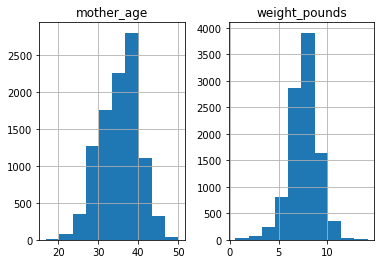

In [3]:
births[['weight_pounds', 'mother_age']].hist()

In [4]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext()
spark = SparkSession(sc)

In [5]:
sparkDF = spark.createDataFrame(births)
sparkDF.count()

10000

In [6]:
sparkDF.show(n=5)

+-----------+----+-----+----+----+-----+-------+----------+-------------+---------+----------+----------+----------------------+-----------+----------+---------------+--------+--------------+------------------+-------------+------------------+-----------+---------------+------------------+----------------+---------------+---------+---------+-----------+----------+-------------+
|source_year|year|month| day|wday|state|is_male|child_race|weight_pounds|plurality|apgar_1min|apgar_5min|mother_residence_state|mother_race|mother_age|gestation_weeks|     lmp|mother_married|mother_birth_state|cigarette_use|cigarettes_per_day|alcohol_use|drinks_per_week|weight_gain_pounds|born_alive_alive|born_alive_dead|born_dead|ever_born|father_race|father_age|record_weight|
+-----------+----+-----+----+----+-----+-------+----------+-------------+---------+----------+----------+----------------------+-----------+----------+---------------+--------+--------------+------------------+-------------+--------------